# Python 與機器學習

## 郭耀仁

## 機器學習的定位

![](https://ingomierswacom.files.wordpress.com/2017/04/ai_ml_dl.jpg?w=676)

Source: [rapidminer](https://rapidminer.com/artificial-intelligence-machine-learning-deep-learning/)

## 定義機器學習

[Arthur Samuel](https://en.wikipedia.org/wiki/Arthur_Samuel)
> The field of study that gives computers the ability to learn without being explicitly programmed.

## 定義機器學習（2）

[Tom Mitchell](http://www.cs.cmu.edu/~tom/)
> A computer program is said to learn from experience E with respect to some class of tasks T and performance measure P, if its performance at tasks in T, as measured by P, improves with experience E.

## 定義機器學習（3）

[林軒田](http://www.csie.ntu.edu.tw/~htlin/)
> 我們從小是怎麼樣辨認一棵樹的，是爸爸媽媽告訴我們一百條規則來定義嗎？其實不是的，很大一部分是透過我們自己的觀察很多的樹與不是樹之後，得到並且內化了辨認一棵樹的技巧，機器學習想要做的就是一樣的事情。

## 機器學習的種類

- 監督式學習（Supervised Learning）：具有目標變數的 Labeled data
    - Gmail 會幫你分類郵件
    - [Jin Yang's Hot Dog Claasifier](https://youtu.be/ACmydtFDTGs)
- 非監督式學習（Unsupervised Learning）：沒有目標變數的 Unlabeled data
    - 將客戶分成不同的 Segments

## 機器學習的種類（2）

- 監督式學習（Supervised Learning）
    - 迴歸問題：目標變數是連續型（數值），像是股價、氣溫、匯率、房價...等
    - 分類問題：目標變數是離散型（類別），像是垃圾郵件/非垃圾郵件、熱狗/非熱狗...等

## 迴歸問題

- 假設
- 成本函數
- 梯度遞減

## 迴歸問題（2）

- 假設

> 真實的函數是：$y = f(x)$，在不知道真實函數的情況下，透過訓練資料與演算法而產生的假設是$\hat{y} = h(x)$

## 迴歸問題（3）

- 成本函數（Cost Function）

> 當 $\hat{y}$ 與 $y$ 之間的差異愈小，我們就可以更有自信地說假設跟真實的函數愈相似。

- 常見的成本函數是 MSE（Mean Squared Error）

$$minimize: \frac{1}{2m}\sum_{i=1}^{m}(\hat{y_i}-y_i)^2$$

## 迴歸問題（4）

- 成本函數
    - 如果一個真實的函數是 $y = f(x) = x$

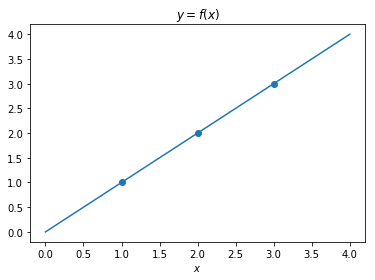

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, 5)
y = x
plt.scatter(x[1:4], y[1:4])
plt.plot(x, y)
plt.xlabel("$x$")
plt.title("$y = f(x)$")
plt.show()

## 迴歸問題（5）

- 成本函數
    - 假設 $\hat{y}= h(x) = 1.5x$

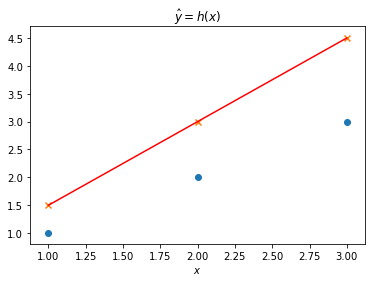

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, 5)
y = x
y_hat = 1.5 * x
plt.scatter(x[1:4], y[1:4])
plt.scatter(x[1:4], y_hat[1:4], marker = 'x')
plt.plot(x[1:4], y_hat[1:4], color = 'r')
plt.xlabel("$x$")
plt.title("$\hat{y} = h(x)$")
plt.show()

## 迴歸問題（6）

- 成本函數
    - 假設 $\hat{y}= h(x) = 0.5x$

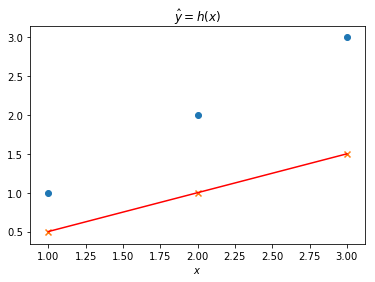

In [3]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, 5)
y = x
y_hat = 0.5 * x
plt.scatter(x[1:4], y[1:4])
plt.scatter(x[1:4], y_hat[1:4], marker = 'x')
plt.plot(x[1:4], y_hat[1:4], color = 'r')
plt.xlabel("$x$")
plt.title("$\hat{y} = h(x)$")
plt.show()

## 迴歸問題（7）

- 成本函數
    - 如果說我們的假設為 $h(x) = \theta_1 x$
    - 在 $0 < \theta_1 < 2$ 之間可以打點來計算成本函數 $J(\theta_1)$

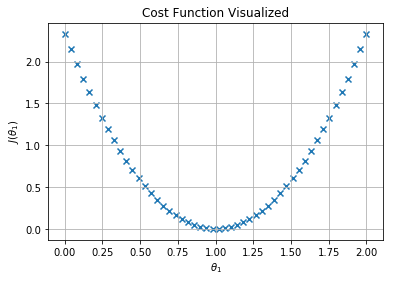

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def cost_function(theta_1, x, y):
    return np.sum((theta_1 * x - y)**2)/(2*len(x))

x = np.arange(1, 4)
y = x
theta_1_arr = np.linspace(0, 2, 50)
cost_arr = []
for i in theta_1_arr:
    cost_arr.append(cost_function(i, x, y))
plt.scatter(theta_1_arr, cost_arr, marker = 'x')
plt.grid(True)
plt.xlabel("$\\theta_1$")
plt.ylabel("$J(\\theta_1)$")
plt.title("Cost Function Visualized")
plt.show()

## 迴歸問題（8）

- 成本函數
    - 如果一個真實的函數是 $y = f(x) = 1 + x$

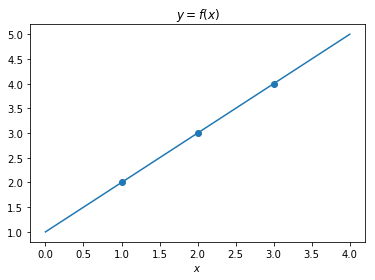

In [5]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, 5)
y = 1 + x
plt.scatter(x[1:4], y[1:4])
plt.plot(x, y)
plt.xlabel("$x$")
plt.title("$y = f(x)$")
plt.show()

## 迴歸問題（9）

- 成本函數
    - 如果說我們的假設為 $h(x) = \theta_0 + \theta_1 x = \theta x$
    - 在 $0 < \theta_0 < 2$ 與 $0 < \theta_1 < 2$ 之間打點來計算成本函數 $J(\theta_0, \theta_1)$
    - 改利用等高線圖視覺化成本函數

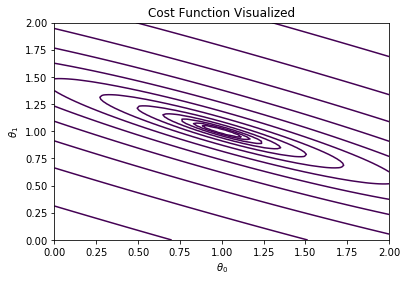

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def cost_function(theta_0, theta_1, x, y):
    return np.sum((theta_0 + theta_1 * x - y)**2)/(2*len(x))

x = np.arange(1, 4)
y = 1 + x
u = np.linspace(0, 2, 100)
theta_0, theta_1 = np.meshgrid(u, u)
J = np.empty(len(u) * len(u)).reshape(len(u), len(u))
for i in range(len(u)):
    for j in range(len(u)):
        J[i, j] = cost_function(theta_0[i, j], theta_1[i, j], x, y)

plt.contour(theta_0, theta_1, J, np.logspace(-3, 3, 20))
plt.xlabel('$\\theta_0$')
plt.ylabel('$\\theta_1$')
plt.title('Cost Function Visualized')
plt.show()

## 迴歸問題（10）

- 梯度遞減（Gradient Descent）

> 透過每個 $\theta_1$ 所得的成本函數微分取得斜率，利用這個斜率逐步取得局部最佳解的方法。

## 迴歸問題（11）

- 梯度遞減（Gradient Descent）
    - 我們先回歸最單純的假設：

$$\hat{y} = h(x) = \theta_1 x_1$$

$$\theta_1 := \theta_1 - \alpha \frac{\mathrm \partial}{\mathrm \partial \theta_1} J(\theta_1)$$

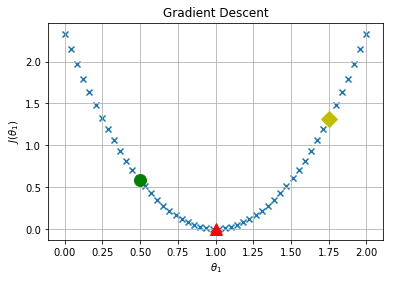

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def cost_function(theta_1, x, y):
    return np.sum((theta_1 * x - y)**2)/(2*len(x))

x = np.arange(1, 4)
y = x
theta_1_arr = np.linspace(0, 2, 50)
cost_arr = []
for i in theta_1_arr:
    cost_arr.append(cost_function(i, x, y))
plt.scatter(theta_1_arr, cost_arr, marker = 'x')
plt.plot(1.75, cost_function(1.75, x, y), marker = 'D', markersize = 12, color = 'y')
plt.plot(0.5, cost_function(0.5, x, y), marker = 'o', markersize = 12, color = 'g')
plt.plot(1, cost_function(1, x, y), marker = '^', markersize = 12, color = 'r')
plt.grid(True)
plt.xlabel("$\\theta_1$")
plt.ylabel("$J(\\theta_1)$")
plt.title("Gradient Descent")
plt.show()

## 迴歸問題（12）

- 梯度遞減（Gradient Descent）
    - $\theta_1 = 0.5$ 的時候（綠圓點），$\frac{\mathrm \partial}{\mathrm \partial \theta_1} J(\theta_1)$ 為負值，所以 $\theta_1$ 會向右邊修正
    - $\theta_1 = 1.75$ 的時候（黃方塊），$\frac{\mathrm \partial}{\mathrm \partial \theta_1} J(\theta_1)$ 為正值，所以 $\theta_1$ 會向左邊修正
    - $\theta_1 = 1.0$ 的時候（紅三角），$\frac{\mathrm \partial}{\mathrm \partial \theta_1} J(\theta_1)$ 為零，$\theta_1$ 收斂

## 迴歸問題（13）

- 梯度遞減（Gradient Descent）
    - $\theta_1$ 修正的速度與 $\alpha$ 這個係數有關
    - $\alpha$ 稱為學習速率（Learning Rate）

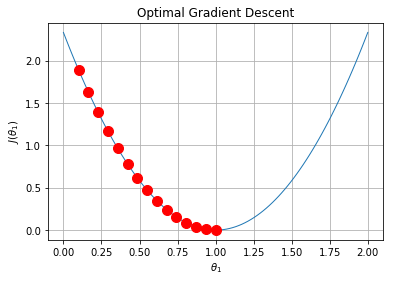

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def cost_function(theta_1, x, y):
    return np.sum((theta_1 * x - y)**2)/(2*len(x))

x = np.arange(1, 4)
y = x
theta_1_arr = np.linspace(0, 2, 100)
cost_arr = []
for i in theta_1_arr:
    cost_arr.append(cost_function(i, x, y))
plt.plot(theta_1_arr, cost_arr, lw = 1)
theta_1_arr = np.linspace(0.1, 1, 15)
cost_arr = []
for i in theta_1_arr:
    cost_arr.append(cost_function(i, x, y))
plt.plot(theta_1_arr, cost_arr, marker = 'o', markersize = 10, color = 'r', lw = 0)
plt.grid(True)
plt.xlabel("$\\theta_1$")
plt.ylabel("$J(\\theta_1)$")
plt.title("Optimal Gradient Descent")
plt.show()

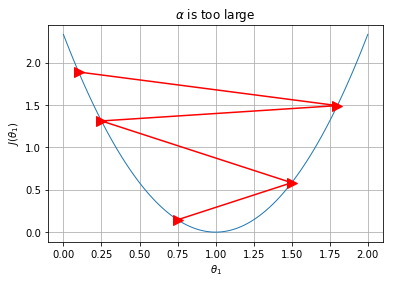

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def cost_function(theta_1, x, y):
    return np.sum((theta_1 * x - y)**2)/(2*len(x))

x = np.arange(1, 4)
y = x
theta_1_arr = np.linspace(0, 2, 100)
cost_arr = []
for i in theta_1_arr:
    cost_arr.append(cost_function(i, x, y))
plt.plot(theta_1_arr, cost_arr, lw = 1)
theta_1_arr = np.array((0.75, 1.5, 0.25, 1.8, 0.1))
cost_arr = []
for i in theta_1_arr:
    cost_arr.append(cost_function(i, x, y))
plt.plot(theta_1_arr, cost_arr, marker = '>', markersize = 10, color = 'r')
plt.grid(True)
plt.xlabel("$\\theta_1$")
plt.ylabel("$J(\\theta_1)$")
plt.title("$\\alpha$ is too large")
plt.show()

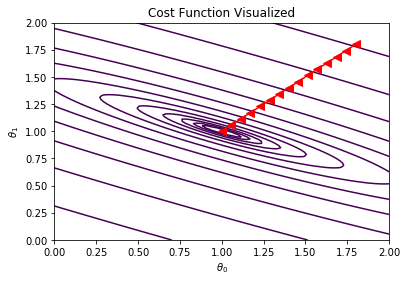

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def cost_function(theta_0, theta_1, x, y):
    return np.sum((theta_0 + theta_1 * x - y)**2)/(2*len(x))

x = np.arange(1, 4)
y = 1 + x
u = np.linspace(0, 2, 100)
theta_0, theta_1 = np.meshgrid(u, u)
J = np.empty(len(u) * len(u)).reshape(len(u), len(u))
for i in range(len(u)):
    for j in range(len(u)):
        J[i, j] = cost_function(theta_0[i, j], theta_1[i, j], x, y)

plt.contour(theta_0, theta_1, J, np.logspace(-3, 3, 20))
theta_0, theta_1 = np.linspace(1.8, 1, 15), np.linspace(1.6, 1, 15)
plt.plot(theta_0, theta_0, marker = '<', markersize = 8, color = 'r')
plt.xlabel('$\\theta_0$')
plt.ylabel('$\\theta_1$')
plt.title('Cost Function Visualized')
plt.show()

## 迴歸問題（14）

- 梯度遞減（Gradient Descent）
    - 將特徵標準化（Standardization）可以加速梯度遞減的收斂
    - 常用的標準化方法有：
        
$$x_i := \frac{x_i - \bar{x}}{\sigma_i}$$
        
$$x_i := \frac{x_i - x_{min}}{x_{max} - x_{min}}$$

## 迴歸問題（15）

- 梯度遞減（Gradient Descent）
    - 如果學習速率夠小，成本函數每一次都會下降
    - 學習速率太小，收斂的速度太慢
    - 學習速率太大，可能會無法收斂

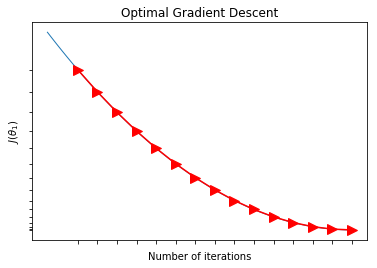

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def cost_function(theta_1, x, y):
    return np.sum((theta_1 * x - y)**2)/(2*len(x))

x = np.arange(1, 4)
y = x
theta_1_arr = np.linspace(0, 1, 100)
cost_arr = []
for i in theta_1_arr:
    cost_arr.append(cost_function(i, x, y))
plt.plot(theta_1_arr, cost_arr, lw = 1)
theta_1_arr = np.linspace(0.1, 1, 15)
cost_arr = []
for i in theta_1_arr:
    cost_arr.append(cost_function(i, x, y))
plt.plot(theta_1_arr, cost_arr, marker = '>', markersize = 10, color = 'r')
plt.xticks(theta_1_arr, [])
plt.yticks(cost_arr, [])
plt.xlabel("Number of iterations")
plt.ylabel("$J(\\theta_1)$")
plt.title("Optimal Gradient Descent")
plt.show()

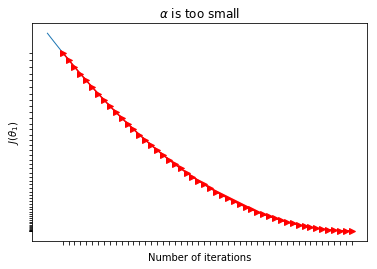

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def cost_function(theta_1, x, y):
    return np.sum((theta_1 * x - y)**2)/(2*len(x))

x = np.arange(1, 4)
y = x
theta_1_arr = np.linspace(0, 1, 100)
cost_arr = []
for i in theta_1_arr:
    cost_arr.append(cost_function(i, x, y))
plt.plot(theta_1_arr, cost_arr, lw = 1)
theta_1_arr = np.linspace(0.05, 1, 50)
cost_arr = []
for i in theta_1_arr:
    cost_arr.append(cost_function(i, x, y))
plt.plot(theta_1_arr, cost_arr, marker = '>', markersize = 6, color = 'r')
plt.xticks(theta_1_arr, [])
plt.yticks(cost_arr, [])
plt.xlabel("Number of iterations")
plt.ylabel("$J(\\theta_1)$")
plt.title("$\\alpha$ is too small")
plt.show()

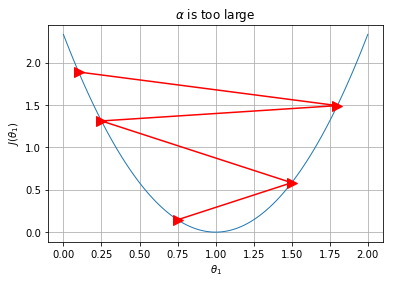

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def cost_function(theta_1, x, y):
    return np.sum((theta_1 * x - y)**2)/(2*len(x))

x = np.arange(1, 4)
y = x
theta_1_arr = np.linspace(0, 2, 100)
cost_arr = []
for i in theta_1_arr:
    cost_arr.append(cost_function(i, x, y))
plt.plot(theta_1_arr, cost_arr, lw = 1)
theta_1_arr = np.array((0.75, 1.5, 0.25, 1.8, 0.1))
cost_arr = []
for i in theta_1_arr:
    cost_arr.append(cost_function(i, x, y))
plt.plot(theta_1_arr, cost_arr, marker = '>', markersize = 10, color = 'r')
plt.grid(True)
plt.xlabel("$\\theta_1$")
plt.ylabel("$J(\\theta_1)$")
plt.title("$\\alpha$ is too large")
plt.show()

## 迴歸問題（16）

- $x_i$ 的個數增加，表示用更多的特徵（features）來建立**假設**：

$$h(x) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + ... + \theta_n x_n$$

- 假如我們令 $x_0 = 1$，就可以將式子廣義地表示為：

$$h(x) = \begin{bmatrix} \theta_0 & \theta_1 & ... & \theta_n \end{bmatrix} \begin{bmatrix} x_0 \\ x_1 \\.\\.\\.\\ x_n \end{bmatrix} = \theta^{T}x$$

## 迴歸問題（17）

- 在梯度遞減的時候，每次迭代都會同時更新所有的 $\theta_j$

$$\theta_j := \theta_j - \alpha \frac{\mathrm \partial}{\mathrm \partial \theta_j}J(\theta) \text{ }\text{ }\text{ }\text{ }for\text{ } j = 0 \text{ }...\text{ }n$$

## 參考連結

- [Machine Learning Foundations (機器學習基石)](https://www.youtube.com/playlist?list=PLXVfgk9fNX2I7tB6oIINGBmW50rrmFTqf)
- [Machine Learning Techniques (機器學習技法)](https://www.youtube.com/playlist?list=PLXVfgk9fNX2IQOYPmqjqWsNUFl2kpk1U2)
- [Machine Learning](https://www.coursera.org/learn/machine-learning/home/welcome)